In [1]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import xarray as xr
from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools

%matplotlib inline

/home/sallen/anaconda/envs/py36/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [17]:
mesh = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
bathy = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
mesh

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    file_name: mesh_mask.nc
    TimeStamp: 30/09/2017 16:10:02 -0700
    dimensions(sizes): x(398), y(898), z(40), t(1)
    variables(dimensions): float32 nav_lon(y,x), float32 nav_lat(y,x), float32 nav_lev(z), float64 time_counter(t), int8 tmask(t,z,y,x), int8 umask(t,z,y,x), int8 vmask(t,z,y,x), int8 fmask(t,z,y,x), int8 tmaskutil(t,y,x), int8 umaskutil(t,y,x), int8 vmaskutil(t,y,x), int8 fmaskutil(t,y,x), float32 glamt(t,y,x), float32 glamu(t,y,x), float32 glamv(t,y,x), float32 glamf(t,y,x), float32 gphit(t,y,x), float32 gphiu(t,y,x), float32 gphiv(t,y,x), float32 gphif(t,y,x), float64 e1t(t,y,x), float64 e1u(t,y,x), float64 e1v(t,y,x), float64 e1f(t,y,x), float64 e2t(t,y,x), float64 e2u(t,y,x), float64 e2v(t,y,x), float64 e2f(t,y,x), float64 ff(t,y,x), int16 mbathy(t,y,x), int16 misf(t,y,x), float32 isfdraft(t,y,x), float64 e3t_0(t,z,y,x), float64 e3u_0(t,z,y,x), float64 e3v_0(t,z,y,x), float64 e3

In [9]:
imin, imax = 250, 500
jmin, jmax = 0, 200

In [51]:
def make_plots(fig, ax, variable, name, ng, hd, cmap, vmaxm, vminm, scale):
    green = np.array(ng.variables[variable][0])
    hind = np.array(hd.variables[variable][0])

    colors = axs[0, 0].pcolormesh(green[0, imin:imax, jmin:jmax], cmap=cmap, vmax=vmaxm, vmin=vminm)
    fig.colorbar(colors, ax=axs[0, 0], extend='both')

    colors = axs[0, 1].pcolormesh(hind[0, imin:imax, jmin:jmax], cmap=cmap, vmax=vmaxm, vmin=vminm)
    fig.colorbar(colors, ax=axs[0, 1], extend='both')

    colors = axs[0, 2].pcolormesh(hind[0, imin:imax, jmin:jmax] - green[0, imin:imax, jmin:jmax], cmap='bwr', vmax=scale, vmin=-scale)
    fig.colorbar(colors, ax=axs[0, 2], extend='both')

    for ax in [axs[0, 0], axs[0, 1], axs[0, 2]]:
        viz_tools.set_aspect(ax)
  
    vis.contour_thalweg(axs[1, 0], green, bathy, mesh, np.arange(vminm, 1.02*vmaxm, 0.05*(vmaxm-vminm)), cmap=cmap)
    vis.contour_thalweg(axs[1, 1], hind, bathy, mesh, np.arange(vminm, 1.02*vmaxm, 0.05*(vmaxm-vminm)), cmap=cmap)
    vis.contour_thalweg(axs[1, 2], hind-green, bathy, mesh, np.arange(-scale, 1.05*scale, 0.1*scale), cmap='bwr')
    
    ii, ij, ik = 350, 430, 34
    colors = axs[2, 0].pcolormesh(range(ii, ij), mesh['gdept_1d'][0, :ik], green[:ik, ii:ij, 25], 
                                  cmap=cmap, vmax=vmaxm, vmin=vminm)
    fig.colorbar(colors, ax=axs[2,0], extend='both')
    colors = axs[2, 1].pcolormesh(range(ii, ij), mesh['gdept_1d'][0, :ik], hind[:ik, ii:ij, 25], 
                                  cmap=cmap, vmax=vmaxm, vmin=vminm)
    fig.colorbar(colors, ax=axs[2,1], extend='both')
    colors = axs[2, 2].pcolormesh(range(ii, ij), mesh['gdept_1d'][0, :ik], hind[:ik, ii:ij, 25] - green[:ik, ii:ij, 25],
                        vmax=scale, vmin=-scale, cmap='bwr')
    fig.colorbar(colors, ax=axs[2, 2], extend='both')
    
    for i in range(3):
        axs[2, i].invert_yaxis()
            
    axs[0,0].set_title('Nov 8: Old Boundary Conditions')
    axs[0,1].set_title('Nov 11: New Boundary Conditions')
    axs[0,2].set_title('Nov 11- Nov 8')

# Physics

In [7]:
ng = xr.open_dataset('/results/SalishSea/nowcast-green/08nov18/SalishSea_1h_20181108_20181108_grid_T.nc')
hd = xr.open_dataset('/results/SalishSea/nowcast-green/11nov18/SalishSea_1h_20181111_20181111_grid_T.nc')

/home/sallen/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


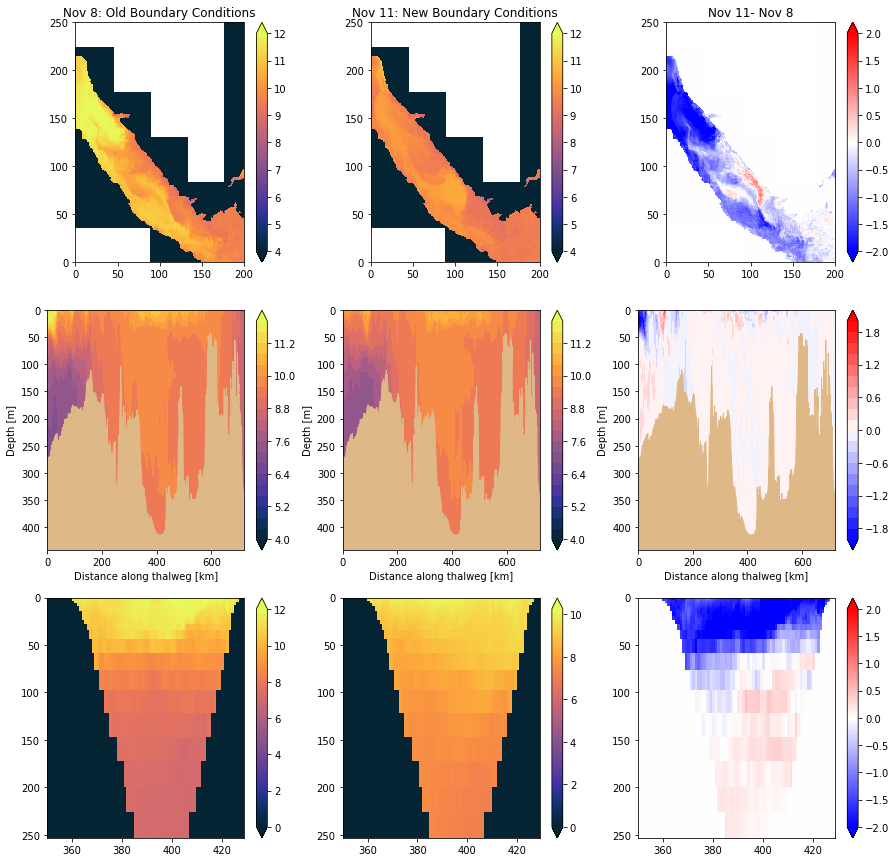

In [48]:
variable, name, cmap = 'votemper', 10, cm.thermal
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 12, 4, 2)

/home/sallen/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


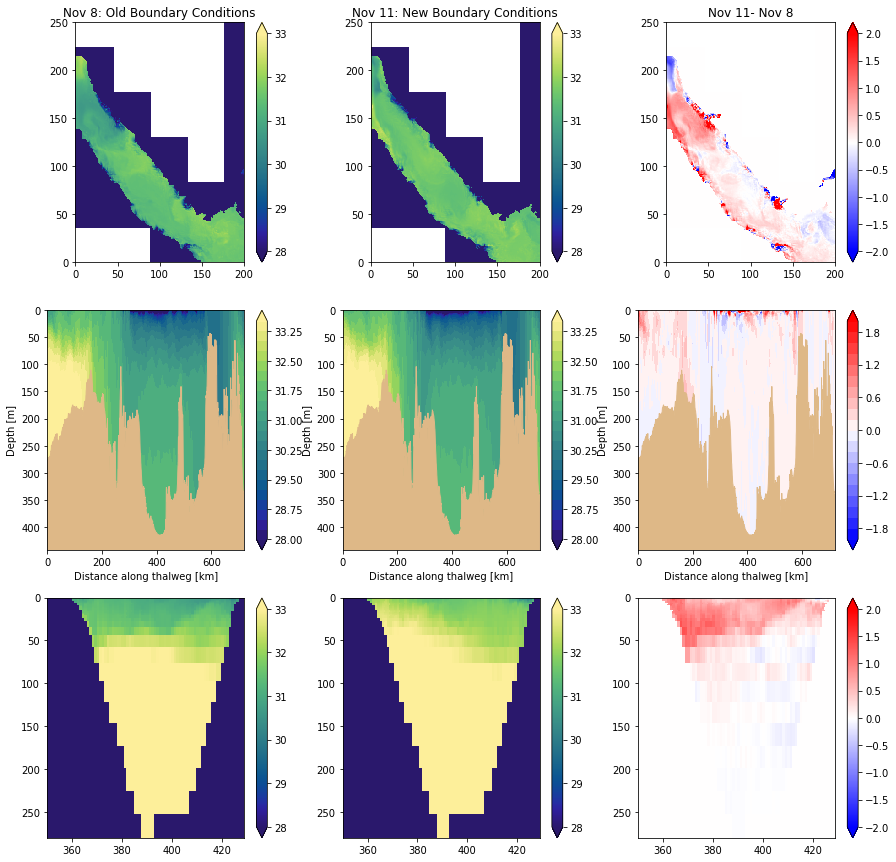

In [52]:
variable, name, cmap = 'vosaline', 'salinity', cm.haline
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 33, 28, 2)

# Biology

In [53]:
ng = xr.open_dataset('/results/SalishSea/nowcast-green/08nov18/SalishSea_1h_20181108_20181108_ptrc_T.nc')
hd = xr.open_dataset('/results/SalishSea/nowcast-green/11nov18/SalishSea_1h_20181111_20181111_ptrc_T.nc')

/home/sallen/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


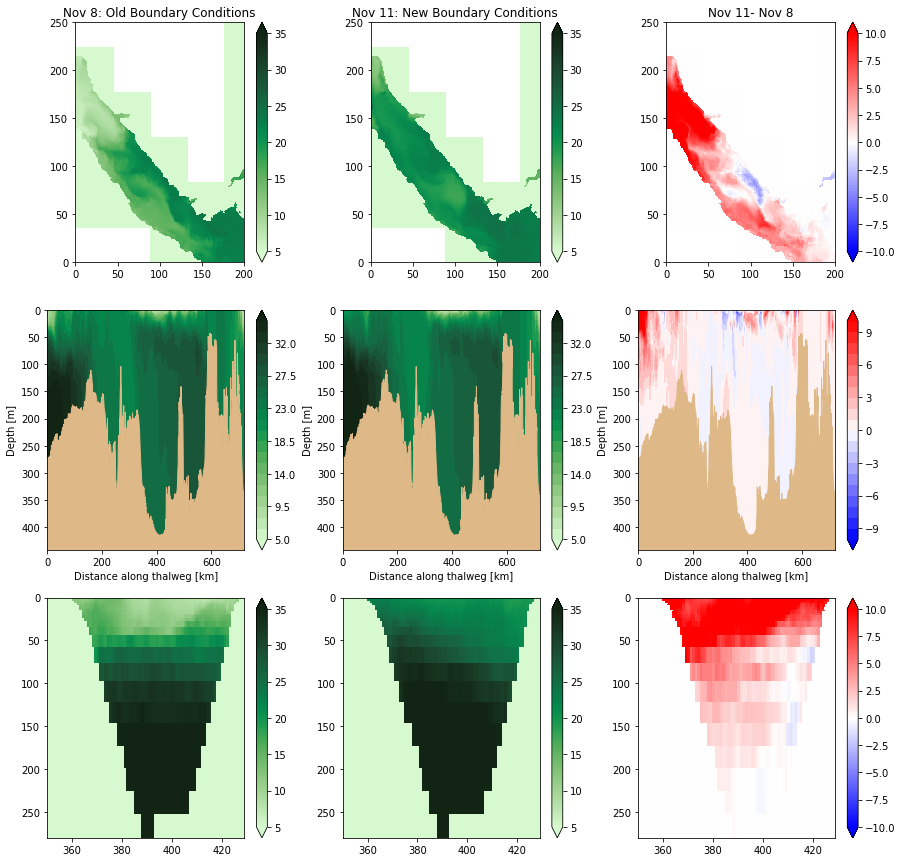

In [55]:
variable, name, cmap = 'nitrate', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 35, 5, 10)

/home/sallen/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


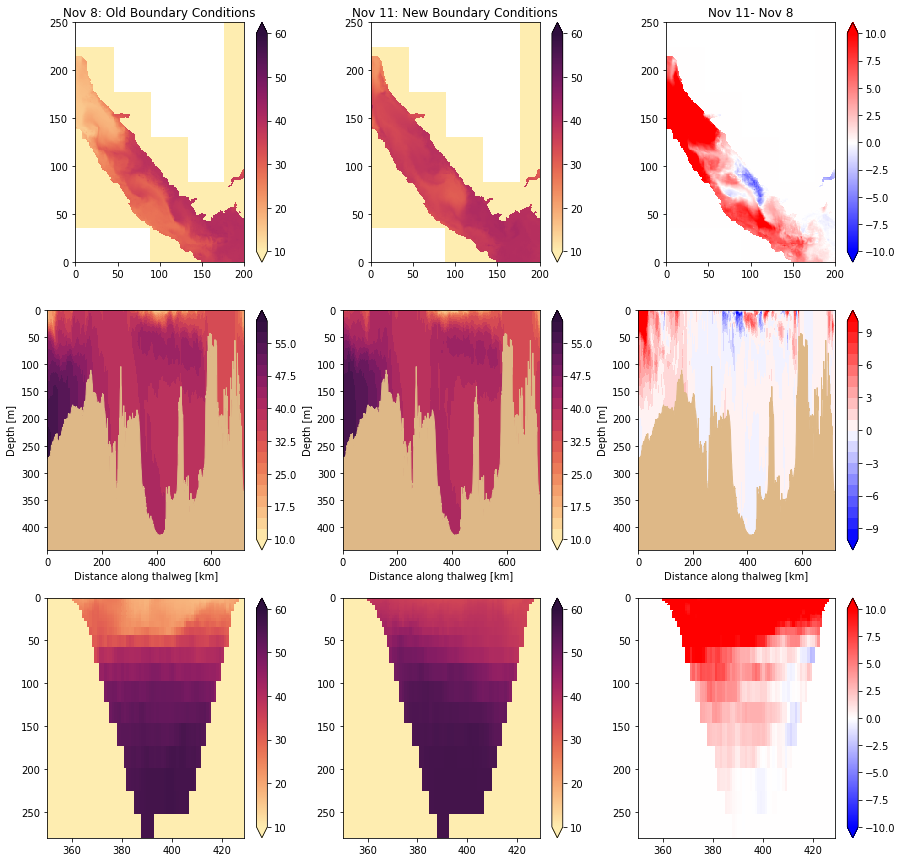

In [56]:
variable, name, cmap = 'silicon', 10, cm.matter
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 60, 10, 10)

/home/sallen/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


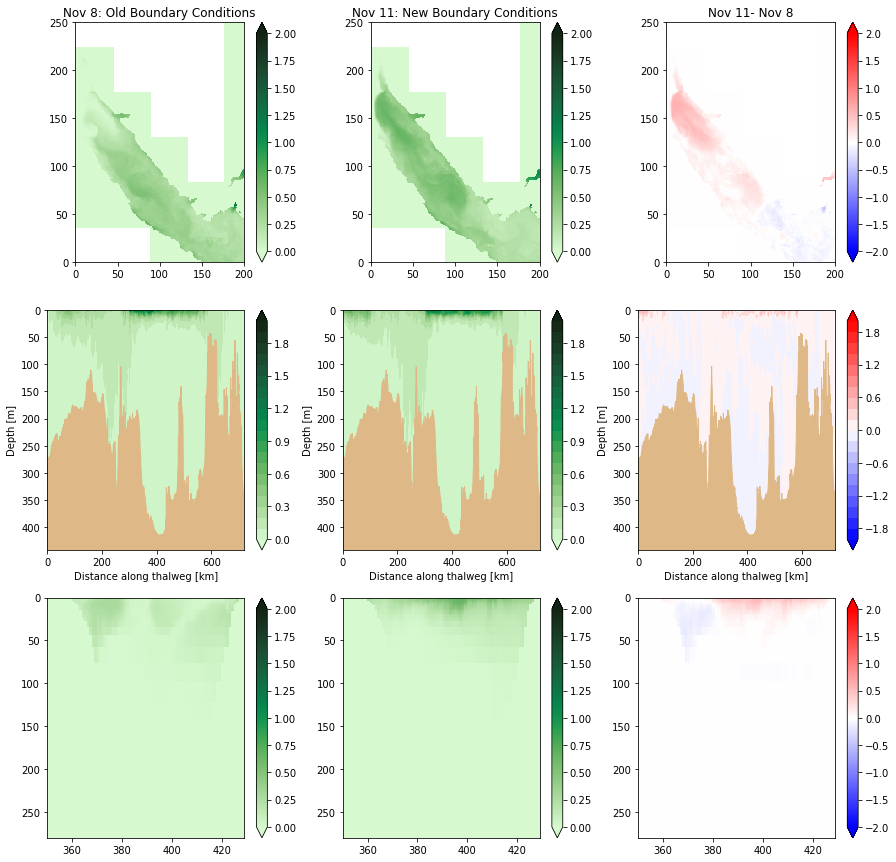

In [57]:
variable, name, cmap = 'diatoms', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 2, 0, 2)

/home/sallen/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


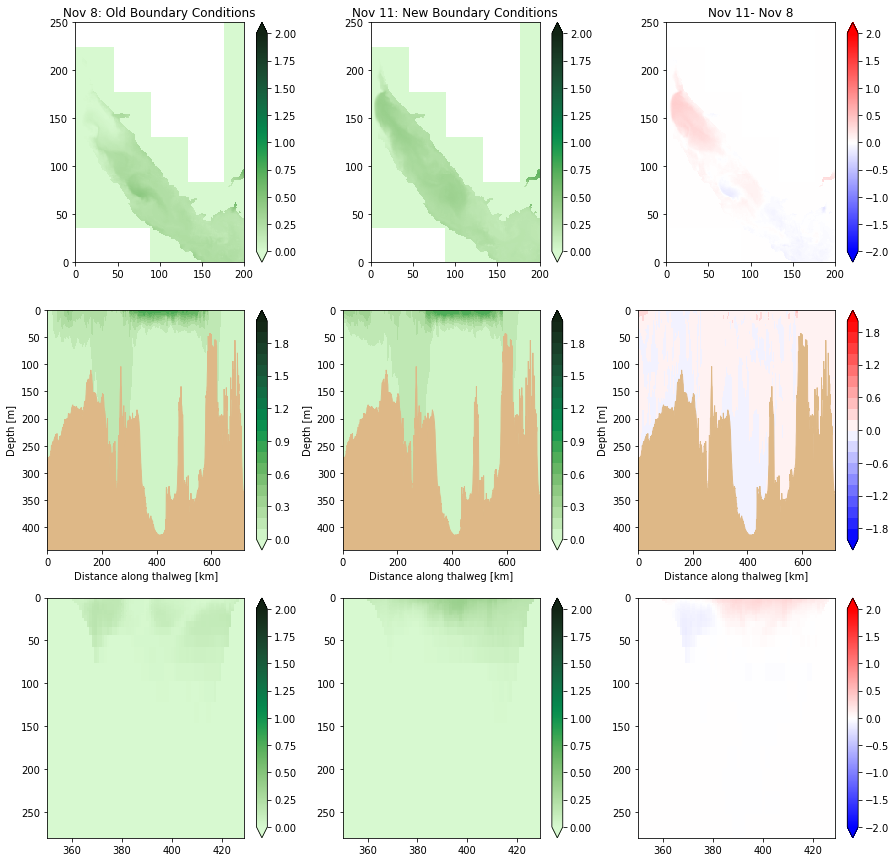

In [58]:
variable, name, cmap = 'flagellates', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 2, 0, 2)

/home/sallen/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


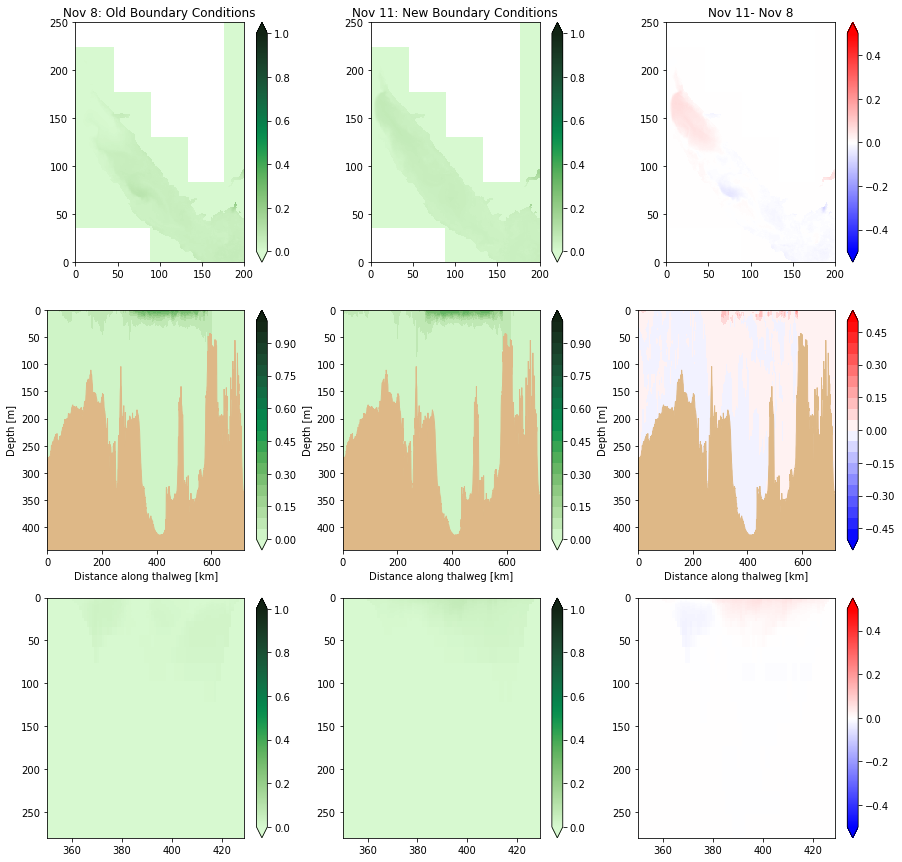

In [59]:
variable, name, cmap = 'ciliates', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 1, 0, 0.5)

/home/sallen/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


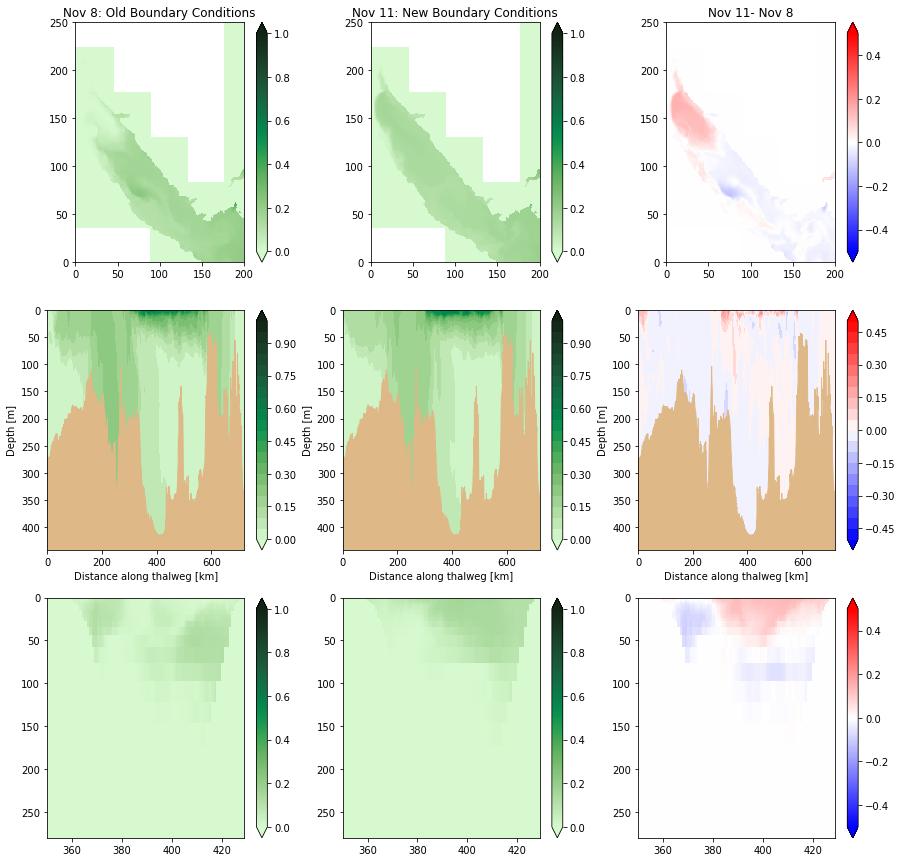

In [60]:
variable, name, cmap = 'microzooplankton', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 1, 0, 0.5)